In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import matplotlib.patches as mpatches

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12,6
sb.set_style('whitegrid')

In [3]:
df=pd.read_excel("C_LIMS_RESULT_TRANS_RELIABILITY.xlsx")
detaildf=pd.read_excel('C_TRANSFORMER_DETAIL.xlsx')

In [9]:
tdf=df.loc[((df.NAME=='Hydrogen - H2')|(df.NAME=='Methane - CH4')|(df.NAME=='Carbon Monoxide - CO')|(df.NAME=='Carbon Dioxide - CO2')|(df.NAME=='Ethylene - C2H4')|(df.NAME=='Ethane - C2H6')|(df.NAME=='Acetylene- C2H2'))]

In [10]:
trdf=tdf[(tdf.SAMPLING_POINT=='72XD01_NMD')]
trdf

,SAMPLE_NUMBER,RESULT_NUMBER,TEXT_ID,SAMPLED_DATE,RECD_DATE,DATE_COMPLETED,DATE_REVIEWED,SAMPLE_STATUS,SAMPLE_IN_SPEC,GROUP_NAME,...,UNITS,DISPLAY_STRING,ORDER_NUMBER,RULE_TYPE,SPEC_RULE,MIN_VALUE,MAX_VALUE,TEXT_VALUE,SAP_FUNC_LOC,SAP_TAG_NO
16,10682276,55691520,OIL/NGU-CPP-SUB-72XD01/051017@1325,2016-11-30,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,22,N,Result <= MAX,NaN,100.0,NaN,NaN,NaN
19,10682276,55691523,OIL/NGU-CPP-SUB-72XD01/051017@1325,2016-11-30,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,25,N,Result <= MAX,NaN,120.0,NaN,NaN,NaN
20,10682276,55691524,OIL/NGU-CPP-SUB-72XD01/051017@1325,2016-11-30,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,26,N,Result <= MAX,NaN,350.0,NaN,NaN,NaN
21,10682276,55691525,OIL/NGU-CPP-SUB-72XD01/051017@1325,2016-11-30,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,27,N,Result <= MAX,NaN,2500.0,NaN,NaN,NaN
22,10682276,55691526,OIL/NGU-CPP-SUB-72XD01/051017@1325,2016-11-30,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,28,N,Result <= MAX,NaN,50.0,NaN,NaN,NaN
23,10682276,55691527,OIL/NGU-CPP-SUB-72XD01/051017@1325,2016-11-30,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,29,N,Result <= MAX,NaN,65.0,NaN,NaN,NaN
24,10682276,55691528,OIL/NGU-CPP-SUB-72XD01/051017@1325,2016-11-30,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,30,N,Result <= MAX,NaN,1.0,NaN,NaN,NaN
47,10682277,55691557,OIL/NGU-CPP-SUB-72XD01/101017@1325,2015-07-16,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,22,N,Result <= MAX,NaN,100.0,NaN,NaN,NaN
50,10682277,55691560,OIL/NGU-CPP-SUB-72XD01/101017@1325,2015-07-16,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,25,N,Result <= MAX,NaN,120.0,NaN,NaN,NaN
51,10682277,55691561,OIL/NGU-CPP-SUB-72XD01/101017@1325,2015-07-16,2017-11-07 15:43:55,2017-11-17 18:44:08,2017-11-17 18:44:08,A,F,ELE_RELIABILITY,...,PPM,ppm,26,N,Result <= MAX,NaN,350.0,NaN,NaN,NaN


In [11]:
sp_time1=trdf.SAMPLED_DATE.max()
sp_time1

Timestamp('2016-11-30 00:00:00')

In [12]:
sp_time2=trdf.SAMPLED_DATE[8:].max()
sp_time2

Timestamp('2015-07-16 00:00:00')

In [13]:
h2_val1=float(trdf[(trdf.NAME=='Hydrogen - H2')&(trdf.SAMPLED_DATE==sp_time1)].ENTRY)
ch4_val1=float(trdf[(trdf.NAME=='Methane - CH4')&(trdf.SAMPLED_DATE==sp_time1)].ENTRY)
c2h2_val1=float(trdf[(trdf.NAME=='Acetylene- C2H2')&(trdf.SAMPLED_DATE==sp_time1)].ENTRY)
c2h4_val1=float(trdf[(trdf.NAME=='Ethylene - C2H4')&(trdf.SAMPLED_DATE==sp_time1)].ENTRY)
c2h6_val1=float(trdf[(trdf.NAME=='Ethane - C2H6')&(trdf.SAMPLED_DATE==sp_time1)].ENTRY)
co_val1=float(trdf[(trdf.NAME=='Carbon Monoxide - CO')&(trdf.SAMPLED_DATE==sp_time1)].ENTRY)
co2_val1=float(trdf[(trdf.NAME=='Carbon Dioxide - CO2')&(trdf.SAMPLED_DATE==sp_time1)].ENTRY)
s_name_1=trdf.T_SITE.unique()
site_name_1=''.join(s_name_1)
t_name_1=trdf[trdf.SAMPLED_DATE==sp_time1].SAMPLING_POINT.unique()
trans_name_1=''.join(t_name_1)
tdcg_1=h2_val1+ch4_val1+c2h2_val1+c2h4_val1+c2h6_val1+co_val1

In [14]:
tab_1=DataFrame({
    'Site Name':[site_name_1],
    'Transformer ID':[trans_name_1],
    'Hydrogen(H2)':[h2_val1],
    'Methane(CH4)':[ch4_val1],
    'Acetylene(C2H2)':[c2h2_val1],
    'Ethylene(C2H4)':[c2h4_val1],
    'Ethane(C2H6)':[c2h6_val1],
    'Carbon Monoxide(CO)':[co_val1],
    'Carbon Dioxide(CO2)':[co2_val1],
    'TDCG':[tdcg_1]
})

## Annexure 1

In [15]:
tab_1

,Site Name,Transformer ID,Hydrogen(H2),Methane(CH4),Acetylene(C2H2),Ethylene(C2H4),Ethane(C2H6),Carbon Monoxide(CO),Carbon Dioxide(CO2),TDCG
0,NMD,72XD01_NMD,25.0,16.0,0.0,82.0,13.0,23.0,1369.0,159.0


In [16]:
df['SAMPLED_DATE']=pd.to_datetime(df['SAMPLED_DATE'])

In [17]:
h2_val2=float(trdf[(trdf.NAME=='Hydrogen - H2')&(trdf.SAMPLED_DATE==sp_time2)].ENTRY)
ch4_val2=float(trdf[(trdf.NAME=='Methane - CH4')&(trdf.SAMPLED_DATE==sp_time2)].ENTRY)
c2h2_val2=float(trdf[(trdf.NAME=='Acetylene- C2H2')&(trdf.SAMPLED_DATE==sp_time2)].ENTRY)
c2h4_val2=float(trdf[(trdf.NAME=='Ethylene - C2H4')&(trdf.SAMPLED_DATE==sp_time2)].ENTRY)
c2h6_val2=float(trdf[(trdf.NAME=='Ethane - C2H6')&(trdf.SAMPLED_DATE==sp_time2)].ENTRY)
co_val2=float(trdf[(trdf.NAME=='Carbon Monoxide - CO')&(trdf.SAMPLED_DATE==sp_time2)].ENTRY)
co2_val2=float(trdf[(trdf.NAME=='Carbon Dioxide - CO2')&(trdf.SAMPLED_DATE==sp_time2)].ENTRY)
s_name_2=trdf.T_SITE.unique()
site_name_2=''.join(s_name_2)
t_name_2=trdf[trdf.SAMPLED_DATE==sp_time2].SAMPLING_POINT.unique()
trans_name_2=''.join(t_name_2)
tdcg_2=h2_val2+ch4_val2+c2h2_val2+c2h4_val2+c2h6_val2+co_val2

In [18]:
tab_2=pd.DataFrame({
    'Site Name':[site_name_2],
    'Transformer ID':[trans_name_2],
    'Hydrogen(H2)':[h2_val2],
    'Methane(CH4)':[ch4_val2],
    'Acetylene(C2H2)':[c2h2_val2],
    'Ethylene(C2H4)':[c2h4_val2],
    'Ethane(C2H6)':[c2h6_val2],
    'Carbon Monoxide(CO)':[co2_val2],
    'Carbon Dioxide(CO2)':[co2_val2],
    'TDCG':[tdcg_2]
})

In [19]:
tab_2

,Site Name,Transformer ID,Hydrogen(H2),Methane(CH4),Acetylene(C2H2),Ethylene(C2H4),Ethane(C2H6),Carbon Monoxide(CO),Carbon Dioxide(CO2),TDCG
0,NMD,72XD01_NMD,13.0,5.0,1.0,28.0,5.0,2577.0,2577.0,132.0


In [20]:
def find_condition(val):
    if(val<=720):
        print("Carry Normal Operation")
        return "Condition 1"
    elif(val>720 and val<=1920):
        print("Resampling is required")
        return "Condition 2"
    elif(val>1920 and val<=4630):
        print("Resampling is required")
        return "Condition 3"
    else:
        print("Resampling is required")
        return "Condition 4"
con=find_condition(tdcg_1)

Carry Normal Operation


In [21]:
test1=pd.Series([con])

In [22]:
tab_1['Status']=test1

In [23]:
tab_1

,Site Name,Transformer ID,Hydrogen(H2),Methane(CH4),Acetylene(C2H2),Ethylene(C2H4),Ethane(C2H6),Carbon Monoxide(CO),Carbon Dioxide(CO2),TDCG,Status
0,NMD,72XD01_NMD,25.0,16.0,0.0,82.0,13.0,23.0,1369.0,159.0,Condition 1


In [24]:
find_condition(tdcg_1)

Carry Normal Operation


'Condition 1'

In [25]:
diff=sp_time1-sp_time2

In [26]:
diff.days

503

In [27]:
vol_1=float(detaildf[(detaildf.C_TRANSFORMERS=='72XD01_NMD')].OIL_QUANTITY)

### Rate Calculation Annexure 2

In [28]:
Rate=((tdcg_2-tdcg_1)*vol_1*10**-6)/float(diff.days)
Rate

-0.0001581351888667992

### Annexure 3

In [29]:
def rate(S0,S1,V,D):
    return ((S0-S1)*V*10**-6)/float(D) 

In [30]:
condition=""
samp_int=""
recommendation=""
R=rate(tdcg_2,tdcg_1,vol_1,diff.days)
def find_an3(tdcg_1,R):
    if(tdcg_1>4630):
        if(R>30|(R>10 and R<30)):
            condition='Condition 4'
            samp_int="Daily"
            recommendation="Consider Removal From Service Advice From Manufacturer."
        elif(R<10):
            condition='Condition 4'
            samp_int="Weekly"
            recommendation="Exercise extreme caution. Analyze for individual gases. Plan outrage. Advice manufacturer."
    elif(tdcg_1>1920 and tdcg_1<=4630):
        if(R>30|(R>10 and R<30)):
            condition='Condition 3'
            samp_int="Weekly"
            recommendation="Exercise extreme caution. Analyze for individual gases. Plan outrage. Advice manufacturer."
        elif(R<10):
            condition='Condition 3'
            samp_int="Monthly"
            recommendation="Exercise extreme caution. Analyze for individual gases. Plan outrage. Advice manufacturer."
    elif(tdcg_1>720 and tdcg_1<=1920):
        if(R>30|(R>10 and R<30)):
            condition='Condition 2'
            samp_int="Monthly"
            recommendation="Exercise caution Analyze for individual gases Determine Load dependence."
        elif(R<10):
            condition='Condition 2'
            samp_int="Quaterly"
            recommendation="Exercise caution Analyze for individual gases Determine Load dependence."
    elif(R<=720):
        if(R>30):
            condition='Condition 1'
            samp_int="Monthly"
            recommendation="Exercise caution Analyze for individual gases Determine Load dependence."
        elif(R>10 and R<30):
            condition='Condition 1'
            samp_int="Quaterly"
            recommendation="Exercise caution Analyze for individual gases Determine Load dependence." 
        elif(R<10):
            condition='Condition 1'
            samp_int="Annual"
            recommendation="Continue normal operation."
    return condition,samp_int,recommendation

### Calling of Function

In [31]:
#Multiple Value Calling

In [32]:
condition,samp_int,recommendation=find_an3(tdcg_1,R)

### Table for Annexure 3

In [33]:
an3df=pd.DataFrame({
    'Conditions':[condition],
    'TDGC Levels(microlitres/litres)':[tdcg_1],
    'TDGC Rate(micro liter/liter/day)':[R],
    'Sampling interval':[samp_int],
    'Operating Procedures':[recommendation]
})

In [34]:
an3df

,Conditions,TDGC Levels(microlitres/litres),TDGC Rate(micro liter/liter/day),Sampling interval,Operating Procedures
0,Condition 1,159.0,-0.000158,Annual,Continue normal operation.


### Annexure 4 Roger's Ratio

In [35]:
tab_1

,Site Name,Transformer ID,Hydrogen(H2),Methane(CH4),Acetylene(C2H2),Ethylene(C2H4),Ethane(C2H6),Carbon Monoxide(CO),Carbon Dioxide(CO2),TDCG,Status
0,NMD,72XD01_NMD,25.0,16.0,0.0,82.0,13.0,23.0,1369.0,159.0,Condition 1


In [72]:
R2=float(tab_1['Acetylene(C2H2)']/tab_1['Ethylene(C2H4)'])
R1=float(tab_1['Methane(CH4)']/tab_1['Hydrogen(H2)'])
R5=float(tab_1['Ethylene(C2H4)']/tab_1['Ethane(C2H6)'])

In [77]:
R5

6.3076923076923075

In [73]:
case="Default"
sugg_fault="Default"
try:
    def roger_ratio(R1,R2,R5):
        if(R2<0.1):
            if(R1>0.1 and R1<1.0):
                if(R5<0.1):
                    case="CASE 0"
                    sugg_fault="Unit Normal"
                    return case,sugg_fault
                elif(R5>1.0 and R5<3.0):
                    case="CASE 3"
                    sugg_fault="LOW TEMPERATURE THERMAL OVERLOADING"
                    return case,sugg_fault
            elif(R1>1.0):
                if(R5>1.0 and R5<3.0):
                    case="CASE 4" 
                    sugg_fault="THERMAL <700"
                    return case,sugg_fault
                elif(R5>3.0):
                    case="CASE 5"
                    sugg_fault="THERMAL >700"
                    return case,sugg_fault
        elif(R2<1.0):
            if(R1<1.0):
                if(R5<1.0):
                    case="CASE 1"
                    sugg_fault="PARTIAL DISCHARGE"
                    return case,sugg_fault
        elif(R2>0.1 and R2<3.0):
            if(R1>0.1 and R1<1.0):
                if(R5>3.0):
                    case="CASE 2"
                    sugg_fault="HIGH ENERGY ARCHING"
                    return case,sugg_fault
except:
    print("The value nat get executed")

In [74]:
if(case==None and sugg_fault==None):
    print("None")
    case='Invalid'
    sugg_fault='Invalid'
else:
    case,sugg_fault=roger_ratio(R1,R2,R5)

TypeError: 'NoneType' object is not iterable

In [69]:
case

'CASE 3'

In [70]:
sugg_fault

'LOW TEMPERATURE THERMAL OVERLOADING'

In [40]:
an4df=pd.DataFrame({
    'Case':[case],
    'R2 C2H2/C2H4':[R2],
    'R1 CH4/H2':[R1],
    'R5 C2H4/C2H6':[R5],
    'Suggested fault diagnosis':[sugg_fault]
})

In [41]:
an4df

,Case,R2 C2H2/C2H4,R1 CH4/H2,R5 C2H4/C2H6,Suggested fault diagnosis
0,Default,0.64,0.0,6.307692,Default


In [42]:
gas_1=trdf[(trdf.SAMPLED_DATE==sp_time1) & (trdf.NAME!='Carbon Dioxide - CO2')].ENTRY
gas_2=trdf[(trdf.SAMPLED_DATE==sp_time2) & (trdf.NAME!='Carbon Dioxide - CO2')].ENTRY

In [43]:
trdf.NAME.unique()

array(['Hydrogen - H2', 'Methane - CH4', 'Carbon Monoxide - CO',
       'Carbon Dioxide - CO2', 'Ethylene - C2H4', 'Ethane - C2H6',
       'Acetylene- C2H2'], dtype=object)

In [78]:
(df.SAMPLING_POINT.unique())

array(['72XD01_NMD', '72XD02_NMD', '72XD03_NMD', '72XD04_NMD',
       '72XD05_NMD', '72XE01_NMD', '72XE02_NMD', '70SYT1220KV_NMD',
       '70SYT2220KV_NMD', '55ETDC055001_NMD', '50XD00001_NMD',
       '50XD00002_NMD', '50XD00003_NMD'], dtype=object)

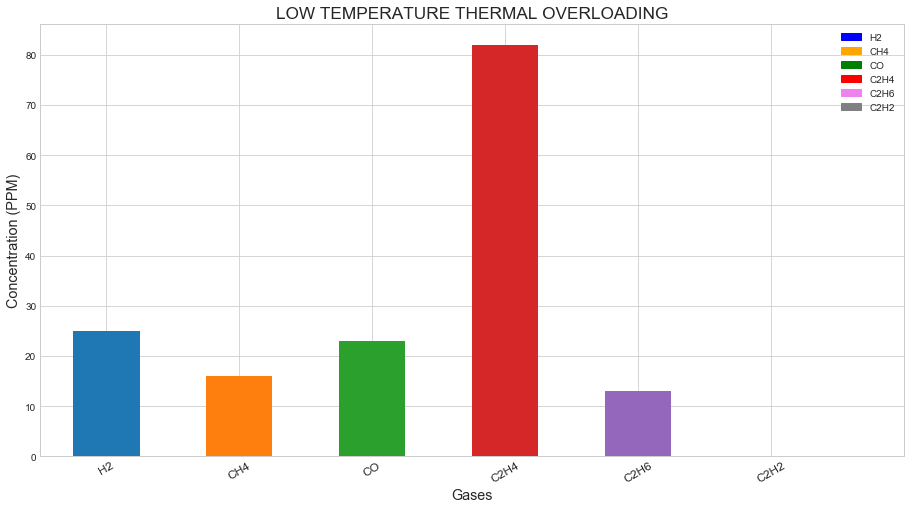

In [71]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
gas_1.plot(kind='bar')
ax.set_xticks(range(7))
ax.set_xticklabels(['H2','CH4','CO','C2H4','C2H6','C2H2'], rotation=30, fontsize='large')
ax.set_title(sugg_fault,fontsize='xx-large')
ax.set_xlabel('Gases',fontsize='x-large')
ax.set_ylabel(('Concentration (PPM)'),fontsize='x-large')

H2 = mpatches.Patch(color='blue', label='H2')
CH4 = mpatches.Patch(color='orange', label='CH4')
CO = mpatches.Patch(color='green', label='CO')
C2H4 = mpatches.Patch(color='red', label='C2H4')
C2H6 = mpatches.Patch(color='violet', label='C2H6')
C2H2 = mpatches.Patch(color='grey', label='C2H2')
ax.legend(handles=[H2,CH4,CO,C2H4,C2H6,C2H2], loc='best')

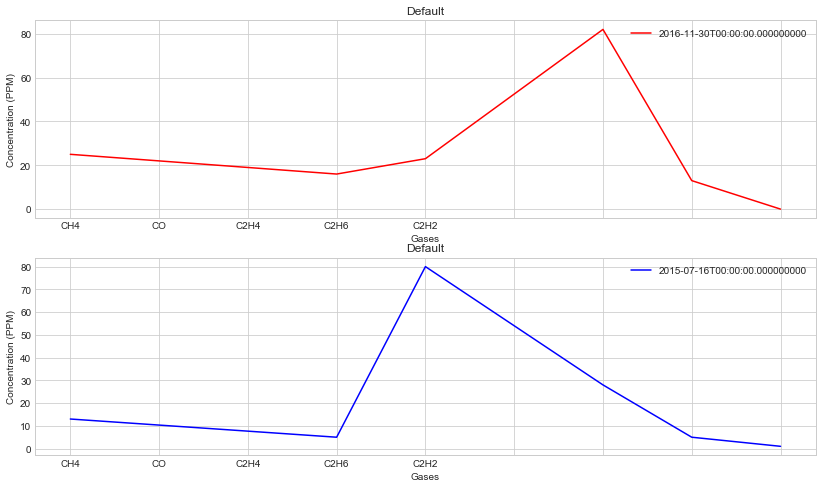

In [45]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211)
ax1.plot(gas_1,color='red')
ax2=fig.add_subplot(212)
ax2.plot(gas_2,color='blue')
ax1.set_xticklabels(['H2','CH4','CO','C2H4','C2H6','C2H2'], rotation=0, fontsize='medium')
ax1.set_title(sugg_fault)
ax1.set_xlabel('Gases')
ax1.set_ylabel('Concentration (PPM)')
ax1.legend(trdf[trdf.SAMPLED_DATE==sp_time1].SAMPLED_DATE.unique(),loc='best')
ax2.set_xticklabels(['H2','CH4','CO','C2H4','C2H6','C2H2'], rotation=0, fontsize='medium')
ax2.set_title(sugg_fault)
ax2.set_xlabel('Gases')
ax2.set_ylabel('Concentration (PPM)')
ax2.legend(trdf[trdf.SAMPLED_DATE==sp_time2].SAMPLED_DATE.unique(),loc='best')

### Annexture 5

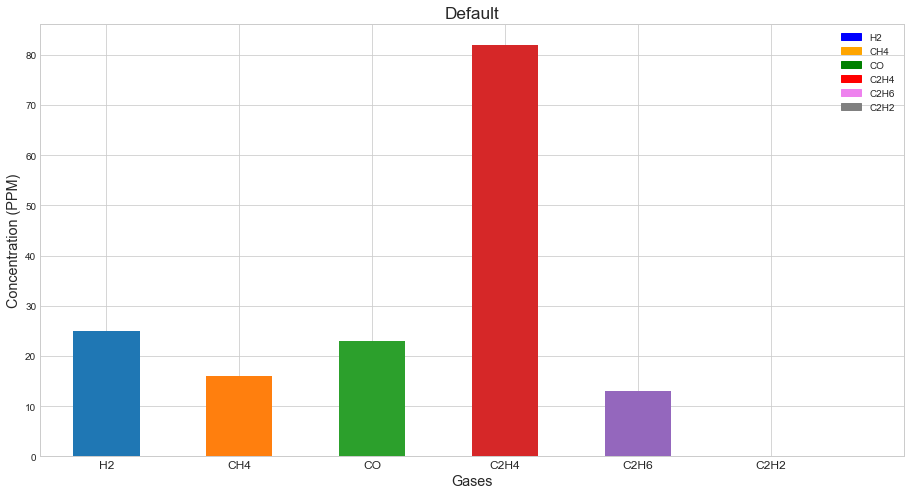

In [46]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
gas_1.plot(kind='bar')
ax.set_xticks(range(7))
ax.set_xticklabels(['H2','CH4','CO','C2H4','C2H6','C2H2'], rotation=0, fontsize='large')
ax.set_title(sugg_fault,fontsize='xx-large')
ax.set_xlabel('Gases',fontsize='x-large')
ax.set_ylabel(('Concentration (PPM)'),fontsize='x-large')

H2 = mpatches.Patch(color='blue', label='H2')
CH4 = mpatches.Patch(color='orange', label='CH4')
CO = mpatches.Patch(color='green', label='CO')
C2H4 = mpatches.Patch(color='red', label='C2H4')
C2H6 = mpatches.Patch(color='violet', label='C2H6')
C2H2 = mpatches.Patch(color='grey', label='C2H2')
ax.legend(handles=[H2,CH4,CO,C2H4,C2H6,C2H2], loc='best')

In [68]:
def label_bar(ax, bars, text_format, is_inside=True, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = max(bar.get_height() for bar in bars)
    if is_inside:
        distance = max_y_value * 0.05
    else:
        distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2
        if is_inside:
            text_y = bar.get_height() - distance
        else:
            text_y = bar.get_height() + distance

        ax.text(text_x, text_y, text, ha='center', va='bottom', **kwargs)


def label_barh(ax, bars, text_format, is_inside=True, **kwargs):
    """
    Attach a text label to each horizontal bar displaying its y value
    """
    max_y_value = max(bar.get_height() for bar in bars)
    if is_inside:
        distance = max_y_value * 0.05
    else:
        distance = max_y_value * 0.01


    for bar in bars:
        text = text_format.format(bar.get_width())
        if is_inside:
            text_x = bar.get_width() - distance
        else:
            text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)

In [ ]:
bars = ax.bar(gas_1, width=0.5, align="center")
value_format = "{:.1%}"  # displaying values as percentage with one fractional digit
label_bar(ax, bars, value_format, is_inside=True, color="white")